Task 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
budget = pd.read_csv('https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Budget.csv')
budget.head()

,Month,Region,State,Model,Budgeted Quantity
0,January,South,Tamil Nadu,Hatchback,12
1,January,South,Tamil Nadu,SUV,8
2,January,South,Tamil Nadu,Sedan,6
3,January,South,Karnataka,Hatchback,11
4,January,South,Karnataka,SUV,7


Task 2 & 3

In [ ]:
transaction = pd.read_csv('https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/AutoElite_Actual.csv')
transaction.head()

,SN,Transaction Details,Date,Month,State,Region,Model,Quantity Sold
0,1,ORD0014010123TNSHBK,1/1/2023,January,Tamil Nadu,South,Hatchback,1
1,2,ORD0045010323TNSHBK,1/3/2023,January,Tamil Nadu,South,Hatchback,3
2,3,ORD0046012723TNSHBK,1/27/2023,January,Tamil Nadu,South,Hatchback,4
3,4,ORD0047010423TNSHBK,1/4/2023,January,Tamil Nadu,South,Hatchback,1
4,5,ORD0015010323TNSSUV,1/3/2023,January,Tamil Nadu,South,SUV,3


Task 4 & 5

In [ ]:
budget.columns
budget.columns=budget.columns.str.lower().str.replace(" ","_")
budget.columns


Index(['month', 'region', 'state', 'model', 'budgeted_quantity'], dtype='object')

In [ ]:
transaction.columns
transaction.columns=transaction.columns.str.lower().str.replace(" ","_")
transaction.columns

Index(['sn', 'transaction_details', 'date', 'month', 'state', 'region',
       'model', 'quantity_sold'],
      dtype='object')

Task 6

In [ ]:
actual=transaction.groupby(['month','state','region','model'])['quantity_sold'].sum().reset_index()
actual.head()

,month,state,region,model,quantity_sold
0,April,Andhra Pradesh,South,Hatchback,10
1,April,Andhra Pradesh,South,SUV,8
2,April,Andhra Pradesh,South,Sedan,5
3,April,Gujarat,West,Hatchback,19
4,April,Gujarat,West,SUV,12


Task 7

In [ ]:
merged_data = pd.merge(budget,actual, on=['month','state','region','model'],how='left')
merged_data.head()

,month,region,state,model,budgeted_quantity,quantity_sold
0,January,South,Tamil Nadu,Hatchback,12,9
1,January,South,Tamil Nadu,SUV,8,8
2,January,South,Tamil Nadu,Sedan,6,6
3,January,South,Karnataka,Hatchback,11,8
4,January,South,Karnataka,SUV,7,9


Task 8

In [ ]:
merged_data['variance']=merged_data['quantity_sold']-merged_data['budgeted_quantity']
merged_data.head()

,month,region,state,model,budgeted_quantity,quantity_sold,variance
0,January,South,Tamil Nadu,Hatchback,12,9,-3
1,January,South,Tamil Nadu,SUV,8,8,0
2,January,South,Tamil Nadu,Sedan,6,6,0
3,January,South,Karnataka,Hatchback,11,8,-3
4,January,South,Karnataka,SUV,7,9,2


Task 9

In [ ]:
month_mapping = {'January': 1,
                 'February':2,
                 'March':3,
                 'April':4,
                 'May':5,
                 'June':6,
                 'July':7,
                 'August':8,
                 'September':9,
                 'October':10,
                 'November':11,
                 'December':12}
merged_data['month_number']=merged_data['month'].map(month_mapping)
merged_data.head()

,month,region,state,model,budgeted_quantity,quantity_sold,variance,month_number
0,January,South,Tamil Nadu,Hatchback,12,9,-3,1
1,January,South,Tamil Nadu,SUV,8,8,0,1
2,January,South,Tamil Nadu,Sedan,6,6,0,1
3,January,South,Karnataka,Hatchback,11,8,-3,1
4,January,South,Karnataka,SUV,7,9,2,1


Task 10

In [ ]:
monthly_variance = merged_data.groupby(['month','month_number'])['variance'].sum().reset_index()
monthly_sales_variance = monthly_variance.sort_values('month_number',ascending = True)
monthly_sales_variance

,month,month_number,variance
4,January,1,2
3,February,2,12
7,March,3,-19
0,April,4,-10
8,May,5,-91
6,June,6,-105
5,July,7,-86
1,August,8,-57
11,September,9,82
10,October,10,130


Task 11

<function matplotlib.pyplot.bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'>

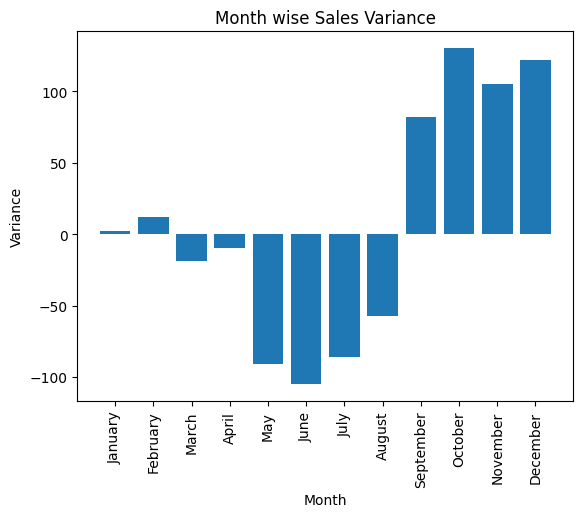

In [ ]:
plt.bar(x=monthly_sales_variance ['month'], height=monthly_sales_variance['variance'])
plt.xlabel('Month')
plt.ylabel('Variance')
plt.title('Month wise Sales Variance')
plt.xticks(ticks = monthly_sales_variance['month'],rotation = 90)
plt.bar

Task 12

In [ ]:
region_wise_variance = merged_data.groupby('region')['variance'].sum().reset_index()
region_wise_variance

,region,variance
0,East,-70
1,North,71
2,South,118
3,West,-34


Task 13

Text(0.5, 1.0, 'Region wise Variance')

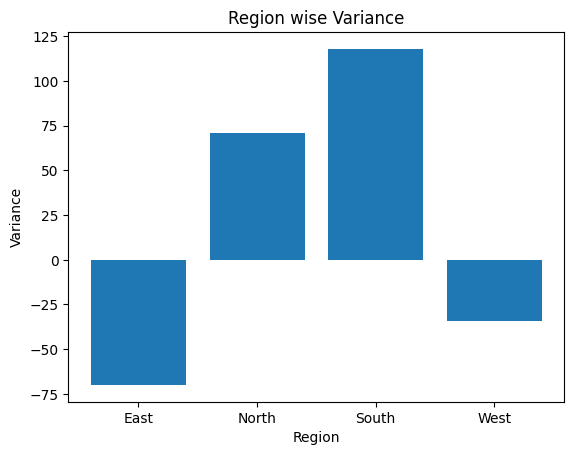

In [ ]:
plt.bar(x=region_wise_variance['region'],height=region_wise_variance['variance'])
plt.xlabel('Region')
plt.ylabel('Variance')
plt.title('Region wise Variance')

Task 14

In [ ]:
state_wise_variance = merged_data.groupby('state')['variance'].sum().reset_index()
state_wise_variance

,state,variance
0,Andhra Pradesh,54
1,Gujarat,-21
2,Haryana,3
3,Karnataka,55
4,Maharashtra,-29
5,Punjab,50
6,Rajasthan,-13
7,Tamil Nadu,38
8,Uttar Pradesh,18
9,West Bengal,-70


Task 15

([<matplotlib.axis.XTick at 0x7f99deaeff90>,
 [Text(0.0, 0, 'Andhra Pradesh'),
  Text(1.0, 0, 'Gujarat'),
  Text(2.0, 0, 'Haryana'),
  Text(3.0, 0, 'Karnataka'),
  Text(4.0, 0, 'Maharashtra'),
  Text(5.0, 0, 'Punjab'),
  Text(6.0, 0, 'Rajasthan'),
  Text(7.0, 0, 'Tamil Nadu'),
  Text(8.0, 0, 'Uttar Pradesh'),
  Text(9.0, 0, 'West Bengal')])

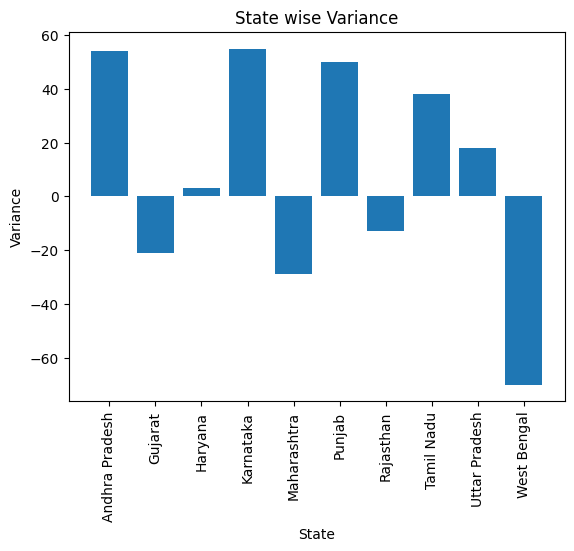

In [ ]:
plt.bar(x=state_wise_variance['state'],height=state_wise_variance['variance'])
plt.xlabel('State')
plt.ylabel('Variance')
plt.title('State wise Variance')
plt.xticks(ticks=state_wise_variance['state'], rotation =90)